<a href="https://colab.research.google.com/github/LTNguyen174/6351071050_Lab3/blob/main/6351071050_LAB3_Bai5(trang_29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kích thước dữ liệu: (569, 32)
Các lớp bệnh: ['M' 'B']
Mã hóa: ['B' 'M'] -> [0, 1]

Đang thực hiện gom cụm K-Means (k=2)...
Adjusted Rand Index (ARI): 0.6536
Độ chính xác (Accuracy) của gom cụm: 0.9051


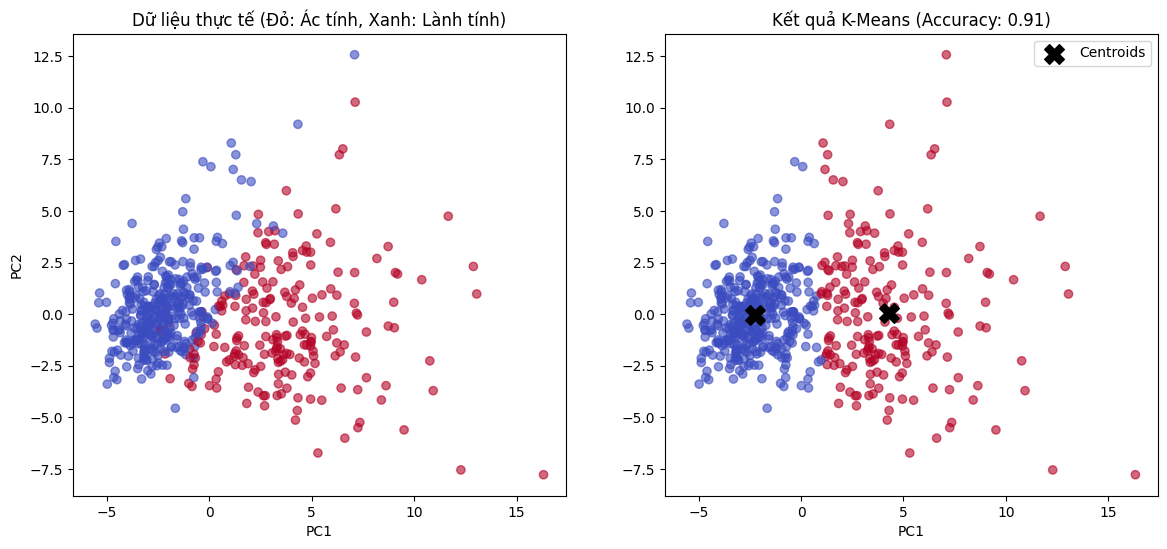

Lý Thanh Nguyên - 6351071050


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
from scipy.stats import mode


feature_names = [f'feature_{i}' for i in range(1, 31)]
col_names = ['ID', 'Diagnosis'] + feature_names

df = pd.read_csv('wdbc.data', header=None, names=col_names)

print("Kích thước dữ liệu:", df.shape)
print("Các lớp bệnh:", df['Diagnosis'].unique())

# Tách đặc trưng (X) và nhãn (y)
# Bỏ cột ID vì không có ý nghĩa phân loại
X = df.drop(['ID', 'Diagnosis'], axis=1).values
y_str = df['Diagnosis'].values

# Mã hóa nhãn: M (Malignant-Ác tính) -> 1, B (Benign-Lành tính) -> 0
le = LabelEncoder()
y_true = le.fit_transform(y_str)
print(f"Mã hóa: {le.classes_} -> [0, 1]")

# CHUẨN HÓA DỮ LIỆU (Bước cực kỳ quan trọng với K-Means)
# Vì đơn vị các cột khác nhau (Diện tích > 1000, Độ trơn < 0.1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print("\nĐang thực hiện gom cụm K-Means (k=2)...")
# k=2 tương ứng với 2 nhóm: Lành tính và Ác tính
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
y_pred_clusters = kmeans.fit_predict(X_scaled)

# a) Adjusted Rand Index (ARI) - Đo độ tương đồng
ari = adjusted_rand_score(y_true, y_pred_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# b) Tính Accuracy
# (Cần map nhãn cụm 0/1 của K-Means sang nhãn B/M thực tế)
labels_mapped = np.zeros_like(y_pred_clusters)
for i in range(2):
    mask = (y_pred_clusters == i)
    if np.sum(mask) > 0:
        # Tìm nhãn thực tế phổ biến nhất trong cụm này để gán tên
        most_frequent = mode(y_true[mask], keepdims=True)[0][0]
        labels_mapped[mask] = most_frequent

acc = accuracy_score(y_true, labels_mapped)
print(f"Độ chính xác (Accuracy) của gom cụm: {acc:.4f}")

# Sử dụng PCA để giảm 30 chiều xuống 2 chiều để vẽ biểu đồ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(14, 6))

# Biểu đồ 1: Thực tế (Ground Truth)
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='coolwarm', alpha=0.6)
plt.title('Dữ liệu thực tế (Đỏ: Ác tính, Xanh: Lành tính)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Biểu đồ 2: Kết quả K-Means
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_mapped, cmap='coolwarm', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title(f'Kết quả K-Means (Accuracy: {acc:.2f})')
plt.xlabel('PC1')
plt.legend()

plt.show()
print("Lý Thanh Nguyên - 6351071050")